In [2]:
from data.atac_seq import preprocessing
import giraffe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [3]:
cache = True

In [4]:
if not cache:
    preprocessing.generate_data()

In [ ]:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE162515

In [4]:
def binarySearch(data, val):
    lo, hi = 0, len(data) - 1
    best_ind = lo
    while lo <= hi:
        mid = lo + (hi - lo) // 2
        if data[mid] < val:
            lo = mid + 1
        elif data[mid] > val:
            hi = mid - 1
        else:
            best_ind = mid
            break
        # check if data[mid] is closer to val than data[best_ind]
        if abs(data[mid] - val) < abs(data[best_ind] - val):
            best_ind = mid
    return best_ind

In [3]:
atac = pd.read_csv("data/atac_seq/raw/GSE162515_ATACseq_logCounts.txt", sep = '\t')
rna = pd.read_csv("data/atac_seq/raw/GSE162515_RNAseq_rawCounts.txt", sep = '\t')
expression = pd.read_csv("data/atac_seq/expression.txt", index_col = 0)
print(expression.shape)
motif = pd.read_csv("data/atac_seq/motif.txt", index_col = 0)
print(motif.shape)
ppi = pd.read_csv("data/atac_seq/ppi.csv", index_col = 0)
print(ppi.shape)
access = pd.read_csv("data/atac_seq/access.txt", index_col = 0)
print(access.shape)

(21345, 87)
(21345, 644)
(644, 644)
(21345, 1)


In [6]:
R = giraffe.Giraffe(expression.to_numpy(), motif.to_numpy(), ppi.to_numpy() + np.eye(ppi.shape[0]), iterations = 10).get_regulation()

In [11]:
real = np.corrcoef(np.sum(np.abs(R), axis = 1), access.to_numpy().flatten())[0, 1]
h = []
for i in range(1000):
    tmp = access.to_numpy().flatten()
    random.shuffle(tmp)
    h.append(np.corrcoef(np.sum(np.abs(R), axis = 1), tmp)[0, 1])

In [35]:
np.sum(h < real)

950

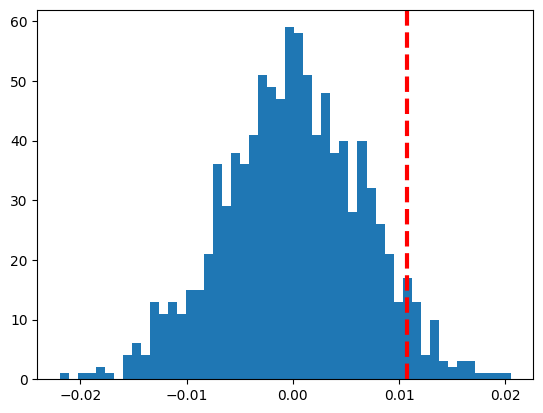

In [43]:
plt.hist(h, bins = 50)
plt.axvline(real, color='red', linestyle='dashed', linewidth=3)
plt.show()

In [8]:
np.corrcoef(np.sum(R, axis = 1), acc.to_numpy().flatten())

array([[1.        , 0.01076472],
       [0.01076472, 1.        ]])